How closely the docs are related to the query doc

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import math 

In [38]:
def cosine_distance(a, b) : 
    return 1 - cosine_similarity(a, b)

def cosine_similarity(a, b) : 
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def find_end_points(point, angle, length) : 
    x, y = point 

    endy = length * math.sin(math.radians(angle)) 
    endx = length * math.cos(math.radians(angle)) 

    return [x, endx], [y, endy]

In [39]:
column_header = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
row_header = ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
doc_term = np.array([
    # D0   D1   D2   D3   D4   D5   D6   D7   D8   D9   D10  D11
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.9, 0.0, 0.3, 0.0, 0.8],
    [0.0, 0.0, 0.9, 0.0, 0.3, 0.1, 0.7, 0.0, 0.2, 0.7, 0.5, 0.5],
    [0.0, 0.0, 0.9, 0.1, 0.0, 0.1, 0.9, 0.3, 0.8, 0.4, 0.1, 0.4],
    [0.0, 0.0, 0.0, 0.0, 0.5, 0.9, 0.3, 0.7, 0.4, 0.6, 0.0, 0.3],
    [0.5, 0.6, 0.0, 0.7, 0.3, 0.3, 0.9, 0.1, 0.0, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.8, 0.0, 0.6, 0.6, 0.0, 0.1, 0.4, 0.9, 0.3, 0.1],
    [0.35, 0.4, 0.0, 0.5, 0.5, 0.1, 0.7, 0.1, 0.5, 0.3, 0.8, 0.1],
    [0.3, 0.3, 0.0, 0.2, 0.8, 0.7, 0.7, 0.8, 0.0, 0.6, 0.8, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.4, 0.5, 0.3]
])

In [40]:
cos_similarity_list, pd_cols_cos_similarity, cos_distance_list, pd_cols_cos_distance = [], [], [], []

for i in range(len(column_header)) : 
    for j in range(len(column_header)) : 
        cos_value = cosine_similarity(np.transpose(doc_term[:, [i]]), doc_term[:, [j]])
        cos_distance = 1.0 - cos_value
        cos_distance_list.append(np.around(cos_distance,decimals=3))
        cos_similarity_list.append(
            np.around(math.degrees(math.acos(min(max(cos_value, -1.0), 1.0))), decimals=1)
        )

    pd_cols_cos_similarity.append(cos_similarity_list)
    pd_cols_cos_distance.append(cos_distance_list)

    cos_similarity_list = []
    cos_distance_list = []

df_cos_sim = pd.DataFrame(pd_cols_cos_similarity, columns=column_header, index=row_header)
print(df_cos_sim)

       D0    D1    D2    D3    D4    D5    D6    D7    D8    D9   D10
D0    0.0   4.0  90.0  14.6  50.6  64.8  41.9  64.6  74.6  72.1  56.9
D1    4.0   0.0  90.0  11.5  52.6  66.0  42.3  67.3  75.3  73.7  59.0
D2   90.0  90.0   0.0  86.4  66.1  71.8  59.5  81.4  57.6  41.7  61.7
D3   14.6  11.5  86.4   0.0  57.6  70.0  40.2  71.3  71.0  75.3  62.5
D4   50.6  52.6  66.1  57.6   0.0  29.5  48.9  53.8  60.8  31.9  36.1
D5   64.8  66.0  71.8  70.0  29.5   0.0  58.1  54.3  66.9  40.5  61.2
D6   41.9  42.3  59.5  40.2  48.9  58.1   0.0  63.0  56.4  53.5  50.5
D7   64.6  67.3  81.4  71.3  53.8  54.3  63.0   0.0  54.3  51.1  69.1
D8   74.6  75.3  57.6  71.0  60.8  66.9  56.4  54.3   0.0  50.3  69.2
D9   72.1  73.7  41.7  75.3  31.9  40.5  53.5  51.1  50.3   0.0  44.5
D10  56.9  59.0  61.7  62.5  36.1  61.2  50.5  69.1  69.2  44.5   0.0


C:\Users\ghora\AppData\Local\Temp\ipykernel_22952\2012114592.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.around(math.degrees(math.acos(min(max(cos_value, -1.0), 1.0))), decimals=1)


In [41]:
df_cos_dist = pd.DataFrame(pd_cols_cos_distance, columns=column_header, index=row_header)
print(df_cos_dist)

            D0         D1         D2         D3         D4         D5  \
D0     [[0.0]]  [[0.002]]    [[1.0]]  [[0.032]]  [[0.365]]  [[0.574]]   
D1   [[0.002]]    [[0.0]]    [[1.0]]   [[0.02]]  [[0.392]]  [[0.594]]   
D2     [[1.0]]    [[1.0]]    [[0.0]]  [[0.937]]  [[0.596]]  [[0.688]]   
D3   [[0.032]]   [[0.02]]  [[0.937]]    [[0.0]]  [[0.464]]  [[0.659]]   
D4   [[0.365]]  [[0.392]]  [[0.596]]  [[0.464]]    [[0.0]]   [[0.13]]   
D5   [[0.574]]  [[0.594]]  [[0.688]]  [[0.659]]   [[0.13]]   [[-0.0]]   
D6   [[0.256]]   [[0.26]]  [[0.492]]  [[0.236]]  [[0.343]]  [[0.472]]   
D7   [[0.572]]  [[0.614]]  [[0.851]]  [[0.679]]  [[0.409]]  [[0.417]]   
D8   [[0.734]]  [[0.745]]  [[0.463]]  [[0.675]]  [[0.512]]  [[0.608]]   
D9   [[0.693]]  [[0.719]]  [[0.254]]  [[0.746]]  [[0.151]]  [[0.239]]   
D10  [[0.454]]  [[0.485]]  [[0.526]]  [[0.538]]  [[0.192]]  [[0.519]]   

            D6         D7         D8         D9        D10  
D0   [[0.256]]  [[0.572]]  [[0.734]]  [[0.693]]  [[0.454]]  
D

C:\Users\ghora\AppData\Local\Temp\ipykernel_22952\3762970842.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X, Y = find_end_points([0, 0], df_cos_sim.iloc[ref_doc][i], np.linalg.norm(doc_term[:, [i]]))
C:\Users\ghora\AppData\Local\Temp\ipykernel_22952\3762970842.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(X[1], Y[1], "D" + str(ref_doc) + "-" + "D" + str(i) + "-(" + str(df_cos_sim.iloc[ref_doc][i]) + u"\u00b0" + ")")
C:\Users\ghora\AppData\Local\Temp\ipykernel_22952\3762970842.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


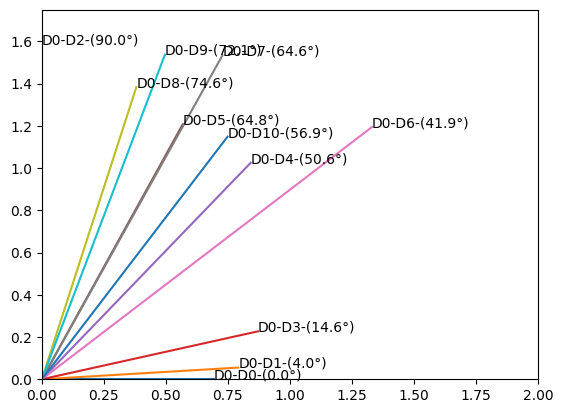

In [47]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([0, 1.75])
ax.set_xlim([0, 2])

ref_doc = 0
for i in range(0, 11):
    X, Y = find_end_points([0, 0], df_cos_sim.iloc[ref_doc][i], np.linalg.norm(doc_term[:, [i]]))
    ax.plot(X, Y)
    ax.annotate(
        "", xy=(X[1], Y[1]), xytext=(0, 0), 
        # arrowprops=dict(arrowstyle="->")
    )c
    ax.text(
        X[1], Y[1], "D" + str(ref_doc) + "-" + "D" + str(i) + "-(" + str(df_cos_sim.iloc[ref_doc][i]) + u"\u00b0" + ")"
    )
fig.show()

In [43]:
query = "D" + str(ref_doc)
rank_order = df_cos_sim.sort_values(query)
print ("\n\nDocument Rank for the query ", query)
print(rank_order[query])



Document Rank for the query  D0
D0      0.0
D1      4.0
D3     14.6
D6     41.9
D4     50.6
D10    56.9
D7     64.6
D5     64.8
D9     72.1
D8     74.6
D2     90.0
Name: D0, dtype: float64
